# Python 2D MHD

In [ ]:
x=5

6
[ 0.          1.          3.33333333  7.2        11.5        18.        ] [ 0.          1.          6.27614237 19.79761935 39.24747159 76.36753237] [ 0.          1.          3.33333333  7.2        11.5        18.        ] [ 0.          1.          6.27614237 19.79761935 39.24747159 76.36753237]


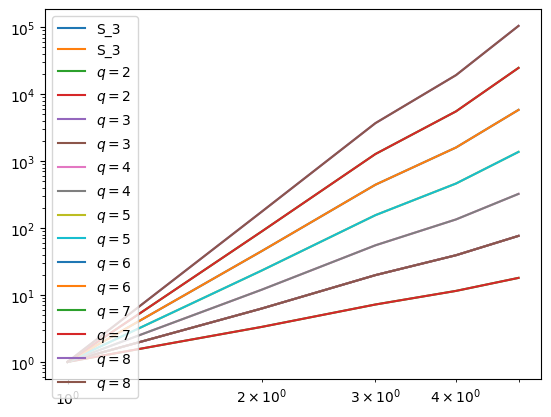

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
Mydatatype = "float64"

def structfn(zpx, zpy, zmx, zmy, sf_p, sf_m):
    dzpx = np.zeros(Nby2, dtype=Mydatatype)
    dzpy = np.zeros(Nby2, dtype=Mydatatype)
    dzmx = np.zeros(Nby2, dtype=Mydatatype)
    dzmy = np.zeros(Nby2, dtype=Mydatatype)
    temp_arr = np.zeros(Nby2, dtype=Mydatatype)


    for lx in range(N[0]//2):
        for ly in range(N[1]//2):

            l_vec = (lx, ly)
            l_norm = np.linalg.norm(l_vec)
            l_ind = math.ceil(l_norm)

            dzpx = zpx[lx:N[0]//2+lx, ly:N[1]//2+ly]-zpx[0:N[0]//2, 0:N[1]//2]
            dzpy = zpy[lx:N[0]//2+lx, ly:N[1]//2+ly]-zpy[0:N[0]//2, 0:N[1]//2]
            
            dzmx = zmx[lx:N[0]//2+lx, ly:N[1]//2+ly]-zmx[0:N[0]//2, 0:N[1]//2]
            dzmy = zmy[lx:N[0]//2+lx, ly:N[1]//2+ly]-zmy[0:N[0]//2, 0:N[1]//2]
           # print(lx, ly, dux[0,0], duy[0,0], dux[1,1], duy[1,1])
            if (l_norm > 1e-5):
                temp_arr  =  (dzpx**2 + dzpy**2)*(dzmx*lx + dzmy*ly)/l_norm
            sf_p[0,l_ind]  +=  np.mean(temp_arr)

            if (l_norm > 1e-5):
                temp_arr  =  (dzmx**2 + dzmy**2)*(dzpx*lx + dzpy*ly)/l_norm
            sf_m[0,l_ind]  +=  np.mean(temp_arr)

            for q in range(qmin,qmax+1):
                if (l_norm > 1e-5):
                    temp_arr  =  (dzpx*lx + dzpy*ly)/l_norm   
                sf_p[q-qmin+1,l_ind] += np.mean(temp_arr**q)

                if (l_norm > 1e-5):
                    temp_arr  =  (dzmx*lx + dzmy*ly)/l_norm   
                sf_m[q-qmin+1,l_ind] += np.mean(temp_arr**q)


# MAIN
N = (8,8)
Nby2 = (N[0]//2, N[1]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 8
Qdiff_p1 = qmax-qmin+2
sf_p = np.zeros((Qdiff_p1, lmax))
sf_m = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1
#        print("count ", i, j, ind, count[ind])

zpx = np.ones(N, dtype=Mydatatype)
zpy = np.ones(N, dtype=Mydatatype)
zmx = np.ones(N, dtype=Mydatatype)
zmy = np.ones(N, dtype=Mydatatype)

dx = dy =  1
for i in range(N[0]):
    for j in range(N[1]):
        zpx[i,j] = zmx[i,j] = i*dx
        zpy[i,j] = zmy[i,j] = j*dy

xforsf = np.arange(lmax)*dx
print(lmax)

structfn(zpx, zpy, zmx, zmy, sf_p, sf_m)
for l_loop in range(lmax):
    sf_p[:,l_loop] /= count[l_loop]
    sf_m[:,l_loop] /= count[l_loop]

plt.figure()
plt.loglog(xforsf[1:], sf_p[0,1:], label='S_3')
plt.loglog(xforsf[1:], sf_m[0,1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
    plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('numba2.png')

print( sf_p[1,:], sf_p[2,:], sf_m[1,:], sf_m[2,:])

# 3D Python code

10
[ 0.          1.          2.99999998  6.99999984 12.30434749 20.04347826
 30.2631581  42.55555556 55.60000076 67.00000763] [  0.           1.           5.38306178  18.94750532  43.49072548
  90.34295687 167.29769416 278.57967038 415.33237712 548.41882324]


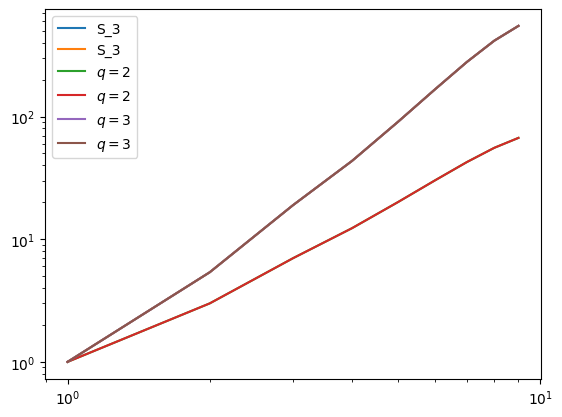

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import math

def structfn(zpx, zpy, zpz, zmx, zmy, zmz, sf_p, sf_m):
    dzpx = np.zeros(Nby2, dtype=Mydatatype)
    dzpy = np.zeros(Nby2, dtype=Mydatatype)
    dzpz = np.zeros(Nby2, dtype=Mydatatype)

    dzmx = np.zeros(Nby2, dtype=Mydatatype)
    dzmy = np.zeros(Nby2, dtype=Mydatatype)
    dzmz = np.zeros(Nby2, dtype=Mydatatype)
    temp_arr = np.zeros(Nby2, dtype=Mydatatype)

    for lx in range(N[0]//2):
        for ly in range(N[1]//2):
            for lz in range(N[2]//2):
                l_vec = (lx, ly, lz)
                l_norm = np.linalg.norm(l_vec)
                l_ind = math.ceil(l_norm)

                dzpx = zpx[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -zpx[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                dzpy = zpy[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -zpy[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                dzpz = zpz[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -zpz[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]

                dzmx = zmx[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -zmx[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                dzmy = zmy[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -zmy[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                dzmz = zmz[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -zmz[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]            

                if (l_norm > 1e-5):
                    temp_arr  =  (dzpx**2 + dzpy**2 + dzpz**2) \
                                *(dzmx*lx + dzmy*ly + dzmz*lz)/l_norm
                sf_p[0,l_ind]  +=  np.mean(temp_arr)

                if (l_norm > 1e-5):
                    temp_arr  =  (dzmx**2 + dzmy**2 + dzmz**2) \
                                *(dzpx*lx + dzpy*ly + dzpz*lz)/l_norm
                sf_m[0,l_ind]  +=  np.mean(temp_arr)

                for q in range(qmin,qmax+1):
                    if (l_norm > 1e-5):
                        temp_arr  =  (dzpx*lx + dzpy*ly + dzpz*lz)/l_norm   
                    sf_p[q-qmin+1,l_ind] += np.mean(temp_arr**q)

                    if (l_norm > 1e-5):
                        temp_arr  =  (dzmx*lx + dzmy*ly + dzmz*lz)/l_norm   
                    sf_m[q-qmin+1,l_ind] += np.mean(temp_arr**q)


N = (8,8,16)
Nby2 = (N[0]//2, N[1]//2, N[2]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 3
Qdiff_p1 = qmax-qmin+2
sf_p = np.zeros((Qdiff_p1, lmax))
sf_m = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1

zpx = np.ones(N, dtype=Mydatatype)
zpy = np.ones(N, dtype=Mydatatype)
zpz = np.ones(N, dtype=Mydatatype)

zmx = np.ones(N, dtype=Mydatatype)
zmy = np.ones(N, dtype=Mydatatype)
zmz = np.ones(N, dtype=Mydatatype)

dx = dy = dz = 1
for i in range(N[0]):
    for j in range(N[1]):
        for k in range(N[2]):
            zpx[i,j,k] = zmx[i,j,k] = i*dx
            zpy[i,j,k] = zmy[i,j,k] = j*dy
            zpz[i,j,k] = zmz[i,j,k] = k*dz
xforsf = np.arange(lmax)*dx
print(lmax)

structfn(zpx, zpy, zpz, zmx, zmy, zmz, sf_p, sf_m)
for l_loop in range(lmax):
    sf_p[:,l_loop] /= count[l_loop]
    sf_m[:,l_loop] /= count[l_loop]

plt.figure()
plt.loglog(xforsf[1:], sf_p[0,1:], label='S_3')
plt.loglog(xforsf[1:], sf_m[0,1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
    plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('numba2.png')

print(sf_p[1,:],sf_p[2,:])

# 2D NUMBA CUDA Python 

(32, 32)
[-0.01309957 -0.11863251 -0.53224736 -1.23078978] [-0.00543826  0.00927093  0.22544193  0.53889404]


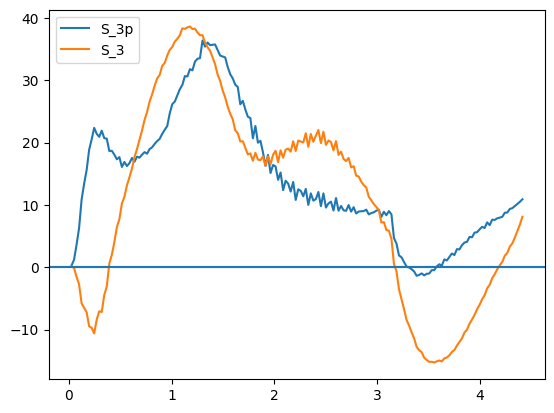

In [25]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

TPB = (4,4)
TPB2 = (TPB[0]*2, TPB[1]*2)  # double elements along each dirn, for u'
normalization_const =  TPB[0]*TPB[1]
##CUDA kernel
@cuda.jit
def structfn(zpx, zpy, zmx, zmy, sf_p, sf_m):

    zpx_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zp_p_x_local = cuda.shared.array(TPB2, dtype=Mydatatype) # zp_prime

    zpy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zp_p_y_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    zmx_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zm_p_x_local = cuda.shared.array(TPB2, dtype=Mydatatype) # zp_prime

    zmy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zm_p_y_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    dz_dot_l_local = cuda.shared.array(TPB, dtype=Mydatatype)

    sf_p_local = cuda.shared.array(shape = (Qdiff_p1,lmax), dtype=Mydatatype)
    sf_m_local = cuda.shared.array(shape = (Qdiff_p1,lmax), dtype=Mydatatype)
    local_result = cuda.shared.array(shape = 1, dtype=Mydatatype)

    local_r = (cuda.threadIdx.x, cuda.threadIdx.y) #(x,y) in C
    block_id = (cuda.blockIdx.x, cuda.blockIdx.y)
    global_r = (cuda.blockIdx.x*TPB[0]+cuda.threadIdx.x, \
              cuda.blockIdx.y*TPB[1]+cuda.threadIdx.y)

    if (local_r == (0,0)):
        for i in range(zpx_local.shape[0]):
            for j in range(zpx_local.shape[1]):
                zpx_local[i,j] = zpx[cuda.blockIdx.x*TPB[0]+i, cuda.blockIdx.y*TPB[1]+j]
                zpy_local[i,j] = zpy[cuda.blockIdx.x*TPB[0]+i, cuda.blockIdx.y*TPB[1]+j]

                zmx_local[i,j] = zmx[cuda.blockIdx.x*TPB[0]+i, cuda.blockIdx.y*TPB[1]+j]
                zmy_local[i,j] = zmy[cuda.blockIdx.x*TPB[0]+i, cuda.blockIdx.y*TPB[1]+j]
                dz_dot_l_local[i,j] = 0
             #   print(i,j, ux_local[i,j],uy_local[i,j])
    cuda.syncthreads()

    if (local_r == (0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
                sf_p_local[q_ind, l_loop] = 0.0
                sf_p[q_ind, l_loop] = 0.0
                sf_m_local[q_ind, l_loop] = 0.0
                sf_m[q_ind, l_loop] = 0.0
    cuda.syncthreads()

   # block_gap = np.zeros(2, dtype=int)
    block_gap = cuda.local.array(2, dtype=int32)

    for bpx_id in range(block_id[0],block_id[0]+BPG[0]):
        for bpy_id in range(block_id[1],block_id[1]+BPG[1]):
            block_gap[0] = bpx_id - block_id[0]
            block_gap[1] = bpy_id - block_id[1]
            if (local_r == (0,0)):
                for i in range(zp_p_x_local.shape[0]):
                    for j in range(zp_p_x_local.shape[1]):
                        zp_p_x_local[i,j] = zpx[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j]
                        zp_p_y_local[i,j] = zpy[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j]

                        zm_p_x_local[i,j] = zmx[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j]
                        zm_p_y_local[i,j] = zmy[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j]
            cuda.syncthreads()
 
            for local_lx in range(TPB[0]):
              for local_ly in range(TPB[1]):
                l = (local_lx + block_gap[0]*TPB[0], local_ly + block_gap[1]*TPB[1])
                l_norm = math.sqrt(l[0]**2+l[1]**2)
                l_ind = int(math.ceil(l_norm))
                local_r_uprime = (cuda.threadIdx.x+local_lx, cuda.threadIdx.y+local_ly)
                dzp_vec = (zp_p_x_local[local_r_uprime]-zpx_local[local_r], \
                            zp_p_y_local[local_r_uprime]-zpy_local[local_r])
                dzm_vec = (zm_p_x_local[local_r_uprime]-zmx_local[local_r], \
                            zm_p_y_local[local_r_uprime]-zmy_local[local_r])

                if l_norm > 1e-5:
                  dz_dot_l_local[local_r] = (dzp_vec[0]*l[0]+dzp_vec[1]*l[1])/l_norm
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    local_result[0] = 0
                    cuda.atomic.add(local_result,0,dz_dot_l_local[local_r]**q)                    
                    if (local_r == (0,0)):
                        sf_p_local[q-qmin+1,l_ind] += local_result[0]/normalization_const
                
                if l_norm > 1e-5:
                  dz_dot_l_local[local_r] = (dzm_vec[0]*l[0]+dzm_vec[1]*l[1])/l_norm
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    local_result[0] = 0
                    cuda.atomic.add(local_result,0,dz_dot_l_local[local_r]**q)                    
                    if (local_r == (0,0)):
                        sf_m_local[q-qmin+1,l_ind] += local_result[0]/normalization_const

                if l_norm > 1e-5:  # For S3+
                  dz_dot_l_local[local_r] = (dzp_vec[0]**2+dzp_vec[1]**2)* \
                        (dzm_vec[0]*l[0]+dzm_vec[1]*l[1])/l_norm
                cuda.syncthreads()

                local_result[0] = 0
                cuda.atomic.add(local_result,0,dz_dot_l_local[local_r])
                if (local_r == (0,0)):
                    sf_p_local[0,l_ind] += local_result[0]/normalization_const

                if l_norm > 1e-5:  # For S3-
                  dz_dot_l_local[local_r] = (dzm_vec[0]**2+dzm_vec[1]**2)* \
                        (dzp_vec[0]*l[0]+dzp_vec[1]*l[1])/l_norm
                cuda.syncthreads()

                local_result[0] = 0
                cuda.atomic.add(local_result,0,dz_dot_l_local[local_r])
                if (local_r == (0,0)):
                    sf_m_local[0,l_ind] += local_result[0]/normalization_const    
    
    if (local_r == (0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
                cuda.atomic.add(sf_p, (q_ind,l_loop), sf_p_local[q_ind,l_loop])
                cuda.atomic.add(sf_m, (q_ind,l_loop), sf_m_local[q_ind,l_loop])

    cuda.syncthreads()

    if global_r == (0,0):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
              sf_p[q_ind,l_loop] /= (BPG[0]*BPG[1])
              sf_m[q_ind,l_loop] /= (BPG[0]*BPG[1])
           #   print("in final = ", q_ind, l_loop, sf[q_ind,l_loop]) 

# MAIN
#cuda.select_device(0)  # Select the first GPU
#device = cuda.current_context().device
#print(f"Using GPU: {device.name}")
#print(f"Total shared memory per block: {device.MAX_SHARED_MEMORY_PER_BLOCK}")

N = (256,256)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 3
Qdiff_p1 = qmax-qmin+2
sf_p = np.zeros((Qdiff_p1, lmax))
sf_m = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1


####### Read the data ##########
# zpx = np.ones(N, dtype=Mydatatype)
# zpy = np.ones(N, dtype=Mydatatype)
# zmx = np.ones(N, dtype=Mydatatype)
# zmy = np.ones(N, dtype=Mydatatype)

# File_handle = hp.File("/mnt/disk3_4TB/Abhishek/MHD/2D/3_1/1024/field_60..h5",'r')
File_handle = hp.File("/home/mkv/MHD_data/2D/256_square/field_200..h5",'r')

zpx = np.fft.irfft2(np.asarray(File_handle["zpkx"]))*N[0]*N[1]
zpy = np.fft.irfft2(np.asarray(File_handle["zpkz"]))*N[0]*N[1]
zmx = np.fft.irfft2(np.asarray(File_handle["zmkx"]))*N[0]*N[1]
zmy = np.fft.irfft2(np.asarray(File_handle["zmkz"]))*N[0]*N[1]

'''
print(zpx.shape)
dx = dy =  2*np.pi/
for i in range(N[0]):
    for j in range(N[1]):
        zpx[i,j] = zmx[i,j] = i*dx
        zpy[i,j] = zmy[i,j] = j*dy
'''
dx = dy = 2*np.pi/N[0]
xforsf = np.arange(lmax)*dx


import math
BPG_x = math.ceil(N[0]/(2*TPB[0]))
BPG_y = math.ceil(N[1]/(2*TPB[0]))
BPG = (BPG_x, BPG_y)
print(BPG)
#Copy the arrays to the device
zpx_global_mem = cuda.to_device(zpx)
zpy_global_mem = cuda.to_device(zpy)
sf_p_global_mem = cuda.to_device(sf_p)

zmx_global_mem = cuda.to_device(zmx)
zmy_global_mem = cuda.to_device(zmy)
sf_m_global_mem = cuda.to_device(sf_m)

#start the kernel
structfn[BPG,TPB](zpx_global_mem, zpy_global_mem, zmx_global_mem, zmy_global_mem, \
                    sf_p_global_mem, sf_m_global_mem)

# Copy the result back to the host
sf_p = sf_p_global_mem.copy_to_host()
sf_m = sf_m_global_mem.copy_to_host()
#print("before = ",sf[2,:])
for l_loop in range(lmax):
    sf_p[:,l_loop] /=  count[l_loop]
    sf_m[:,l_loop] /=  count[l_loop]
#print(xforsf)
#print(sf[0,:])


plt.figure()
plt.plot(xforsf[1:], -0.5*sf_p[0,1:]/xforsf[1:], label='S_3p')
plt.plot(xforsf[1:], -0.5*sf_m[0,1:]/xforsf[1:], label='S_3')
plt.axhline(y=0)
plt.axhline(y=0.1)
# for q in range(qmin,qmax+1):
#     plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
#     plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('numba2.png')
print( sf_p[0,1:5],  sf_m[0,1:5])
# print( sf_p[1,:], sf_p[2,:], sf_m[1,:], sf_m[2,:])

[ 0.00000000e+00  1.06162912e-03  5.05047639e-03  1.29435823e-02
  3.54096467e-02  6.15386492e-02  1.33084092e-01  1.99270976e-01
  2.61804626e-01  3.85913416e-01  5.46245166e-01  7.72048792e-01
  8.72658661e-01  1.05651620e+00  1.30061402e+00  1.53579925e+00
  2.00907019e+00  2.11395162e+00  2.47231597e+00  3.08936293e+00
  3.33495556e+00  3.97127530e+00  4.54110969e+00  5.22952329e+00
  5.59935967e+00  5.49894516e+00  6.50464526e+00  6.41674038e+00
  7.25949538e+00  7.32349570e+00  7.94863811e+00  8.71965678e+00
  9.43970940e+00  1.01103873e+01  1.03373365e+01  1.10300945e+01
  1.18780635e+01  1.20528696e+01  1.33332976e+01  1.38821553e+01
  1.48353024e+01  1.63146446e+01  1.62990986e+01  1.75757774e+01
  1.72617035e+01  1.82761053e+01  1.94495859e+01  2.00758052e+01
  2.05614792e+01  2.09266689e+01  2.10863740e+01  2.15311942e+01
  2.15540505e+01  2.21247943e+01  2.23664304e+01  2.31460851e+01
  2.49708170e+01  2.56550944e+01  2.67483026e+01  2.55140520e+01
  2.52894693e+01  2.54940

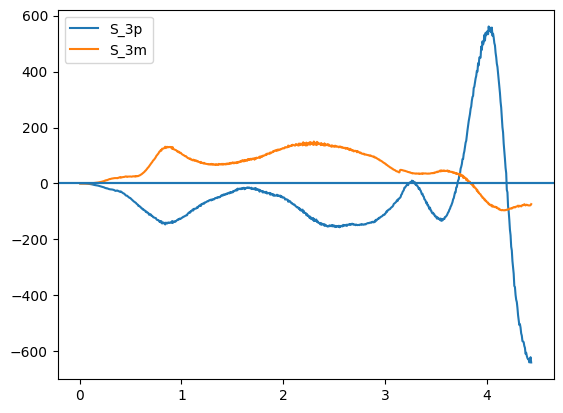

In [18]:
plt.figure()
plt.plot(xforsf[1:], -sf_p[0,1:], label='S_3p')
plt.plot(xforsf[1:], -sf_m[0,1:], label='S_3m')
plt.axhline(y=0)
plt.axhline(y=0.1)
# for q in range(qmin,qmax+1):
#     plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
#     plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
#plt.savefig('numba2.png')
print( sf_p[0,:])
# print( sf_p[1,:], sf_p[2,:], sf_m[

# 3D NUMBA CUDA

/home/phyguest/.local/lib/python3.8/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 2 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[ 0.          2.          6.         14.         23.2173913  19.82608696
  2.84210506  0.          0.          0.        ] [ 0.          2.         10.76612418 37.89501275 81.41623854 86.7309358
 14.7680118   0.          0.          0.        ]


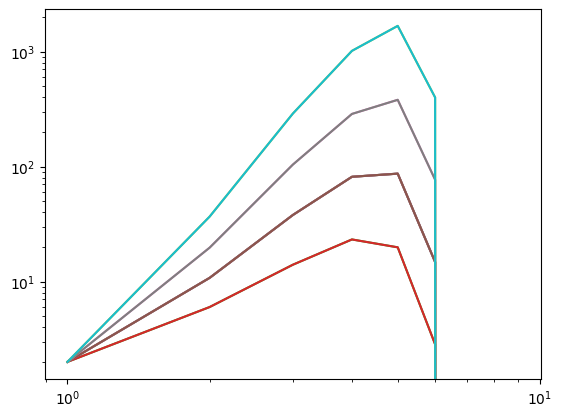

In [168]:
Mydatatype = "float32"
from numba import cuda, float64, float32, int32
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import math


TPB = (4,4,2)
TPB2 = (TPB[0]*2, TPB[1]*2, TPB[2]*2)  # double elements along each dirn, for u'
normalization_const =  TPB[0]*TPB[1]*TPB[2]
##CUDA kernel
@cuda.jit
def structfn(zpx, zpy, zpz, zmx, zmy, zmz, sf_p, sf_m):

    zpx_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zp_p_x_local = cuda.shared.array(TPB2, dtype=Mydatatype) # zp_prime

    zpy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zp_p_y_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    zpz_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zp_p_z_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    zmx_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zm_p_x_local = cuda.shared.array(TPB2, dtype=Mydatatype) # zp_prime

    zmy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zm_p_y_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    zmz_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zm_p_z_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    dz_dot_l_local = cuda.shared.array(TPB, dtype=Mydatatype)

    sf_p_local = cuda.shared.array(shape = (Qdiff_p1,lmax), dtype=Mydatatype)
    sf_m_local = cuda.shared.array(shape = (Qdiff_p1,lmax), dtype=Mydatatype)

    local_result = cuda.shared.array(shape = 1, dtype=Mydatatype)

    local_r = (cuda.threadIdx.x, cuda.threadIdx.y, cuda.threadIdx.z) #(x,y) in C
    block_id = (cuda.blockIdx.x, cuda.blockIdx.y, cuda.blockIdx.z)
    global_r = (cuda.blockIdx.x*TPB[0]+cuda.threadIdx.x, \
                cuda.blockIdx.y*TPB[1]+cuda.threadIdx.y, \
                cuda.blockIdx.y*TPB[1]+cuda.threadIdx.y)

    if (local_r == (0,0,0)):
      for i in range(zpx_local.shape[0]):
         for j in range(zpx_local.shape[1]):
            for k in range(zpx_local.shape[2]):
                zpx_local[i,j,k] = zpx[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]
                zpy_local[i,j,k] = zpy[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]
                zpz_local[i,j,k] = zpz[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]    

                zmx_local[i,j,k] = zmx[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]
                zmy_local[i,j,k] = zmy[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]
                zmz_local[i,j,k] = zmz[cuda.blockIdx.x*TPB[0]+i,  \
                    cuda.blockIdx.y*TPB[1]+j, cuda.blockIdx.z*TPB[2]+k]  
                
                dz_dot_l_local[i,j] = 0
    cuda.syncthreads()

    if (local_r == (0,0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
                sf_p_local[q_ind, l_loop] = 0.0
                sf_p[q_ind, l_loop] = 0.0
                sf_m_local[q_ind, l_loop] = 0.0
                sf_m[q_ind, l_loop] = 0.0
    cuda.syncthreads()

   # block_gap = np.zeros(2, dtype=int)
    block_gap = cuda.local.array(3, dtype=int32)

    for bpx_id in range(block_id[0],block_id[0]+BPG[0]):
      for bpy_id in range(block_id[1],block_id[1]+BPG[1]):
        for bpz_id in range(block_id[2],block_id[2]+BPG[2]):
            block_gap[0] = bpx_id - block_id[0]
            block_gap[1] = bpy_id - block_id[1]
            block_gap[2] = bpz_id - block_id[2]
            if (local_r == (0,0,0)):
              for i in range(zp_p_x_local.shape[0]):
                for j in range(zp_p_x_local.shape[1]):
                    for k in range(zp_p_x_local.shape[2]):
                        zp_p_x_local[i,j,k] = zpx[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]
                        zp_p_y_local[i,j,k] = zpy[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]
                        zp_p_z_local[i,j,k] = zpz[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]

                        zm_p_x_local[i,j,k] = zmx[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]
                        zm_p_y_local[i,j,k] = zmy[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]
                        zm_p_z_local[i,j,k] = zmz[bpx_id*TPB[0]+i, bpy_id*TPB[1]+j, bpz_id*TPB[2]+k]

            cuda.syncthreads()

            for local_lx in range(TPB[0]):
              for local_ly in range(TPB[1]):
                for local_lz in range(TPB[2]):
                    l = (local_lx + block_gap[0]*TPB[0], local_ly + block_gap[1]*TPB[1], \
                         local_lz + block_gap[2]*TPB[2])
                    l_norm = math.sqrt(l[0]**2 +l[1]**2 +l[2]**2)
                    l_ind = int(math.ceil(l_norm))
                    local_r_uprime = (cuda.threadIdx.x+local_lx, cuda.threadIdx.y+local_ly, \
                                        cuda.threadIdx.z+local_lz)
                    dzp_vec = (zp_p_x_local[local_r_uprime]-zpx_local[local_r], \
                               zp_p_y_local[local_r_uprime]-zpy_local[local_r], \
                                zp_p_z_local[local_r_uprime]-zpz_local[local_r])

                    dzm_vec = (zm_p_x_local[local_r_uprime]-zmx_local[local_r], \
                               zm_p_y_local[local_r_uprime]-zmy_local[local_r], \
                                zm_p_z_local[local_r_uprime]-zmz_local[local_r])   

                    if l_norm > 1e-5:
                        dz_dot_l_local[local_r] = (dzp_vec[0]*l[0]+ dzp_vec[1]*l[1]+ dzp_vec[2]*l[2])/l_norm
                    cuda.syncthreads()
                    
                   # print("loop ", dzp_vec[0], dzp_vec[1], dzp_vec[2], dz_dot_l_local[local_r])

                    for q in range(qmin,qmax+1):
                        local_result[0] = 0
                        cuda.atomic.add(local_result,0,dz_dot_l_local[local_r]**q)                    
                        if (local_r == (0,0,0)):
                            sf_p_local[q-qmin+1,l_ind] += local_result[0]/normalization_const
                           # if l == (0,0,1): 
                            #    print("l ", block_id[0], block_id[1], q, dz_dot_l_local[local_r], local_result[0])
                        
                    if l_norm > 1e-5:
                        dz_dot_l_local[local_r] = (dzm_vec[0]*l[0]+ dzm_vec[1]*l[1]+ dzm_vec[2]*l[2])/l_norm
                    cuda.syncthreads()

                    for q in range(qmin,qmax+1):
                        local_result[0] = 0
                        cuda.atomic.add(local_result,0,dz_dot_l_local[local_r]**q)                    
                        if (local_r == (0,0,0)):
                            sf_m_local[q-qmin+1,l_ind] += local_result[0]/normalization_const        
                    
                    if l_norm > 1e-5:  # For S3+
                        dz_dot_l_local[local_r] = (dzp_vec[0]**2+ dzp_vec[1]**2+ dzp_vec[2]**2)* \
                            (dzm_vec[0]*l[0]+ dzm_vec[1]*l[1]+ dzm_vec[2]*l[2])/l_norm
                    cuda.syncthreads()

                    local_result[0] = 0
                    cuda.atomic.add(local_result,0,dz_dot_l_local[local_r])
                    if (local_r == (0,0,0)):
                        sf_p_local[0,l_ind] += local_result[0]/normalization_const

                    if l_norm > 1e-5:  # For S3-
                        dz_dot_l_local[local_r] = (dzm_vec[0]**2+ dzm_vec[1]**2+ dzm_vec[2]**2)* \
                            (dzp_vec[0]*l[0]+ dzp_vec[1]*l[1]+ dzp_vec[2]*l[2])/l_norm
                    cuda.syncthreads()

                    local_result[0] = 0
                    cuda.atomic.add(local_result,0,dz_dot_l_local[local_r])
                    if (local_r == (0,0,0)):
                        sf_m_local[0,l_ind] += local_result[0]/normalization_const    
                
    if (local_r == (0,0,0)):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
                cuda.atomic.add(sf_p, (q_ind,l_loop), sf_p_local[q_ind,l_loop])
                cuda.atomic.add(sf_m, (q_ind,l_loop), sf_m_local[q_ind,l_loop])
    cuda.syncthreads()

    if global_r == (0,0,0):
        for q_ind in range(Qdiff_p1):
            for l_loop in range(lmax):
                sf_p[q_ind,l_loop] /= (BPG[0]*BPG[1])
                sf_m[q_ind,l_loop] /= (BPG[0]*BPG[1])

# MAIN
#cuda.select_device(0)  # Select the first GPU
#device = cuda.current_context().device
#print(f"Using GPU: {device.name}")
#print(f"Total shared memory per block: {device.MAX_SHARED_MEMORY_PER_BLOCK}")

N = (8,8,16)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 5
Qdiff_p1 = qmax-qmin+2
sf_p = np.zeros((Qdiff_p1, lmax))
sf_m = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1


zpx = np.ones(N, dtype=Mydatatype)
zpy = np.ones(N, dtype=Mydatatype)
zpz = np.ones(N, dtype=Mydatatype)

zmx = np.ones(N, dtype=Mydatatype)
zmy = np.ones(N, dtype=Mydatatype)
zmz = np.ones(N, dtype=Mydatatype)

dx = dy = dz = 1
for i in range(N[0]):
    for j in range(N[1]):
        for k in range(N[2]):
            zpx[i,j,k] = zmx[i,j,k] = i*dx
            zpy[i,j,k] = zmy[i,j,k] = j*dy
            zpz[i,j,k] = zmz[i,j,k] = k*dz

xforsf = np.arange(lmax)*dx

import math
BPG_x = math.ceil(N[0]/(2*TPB[0]))
BPG_y = math.ceil(N[1]/(2*TPB[0]))
BPG_z = math.ceil(N[2]/(2*TPB[0]))
BPG = (BPG_x, BPG_y, BPG_z)
#Copy the arrays to the device
zpx_global_mem = cuda.to_device(zpx)
zpy_global_mem = cuda.to_device(zpy)
zpz_global_mem = cuda.to_device(zpz)
sf_p_global_mem = cuda.to_device(sf_p)

zmx_global_mem = cuda.to_device(zmx)
zmy_global_mem = cuda.to_device(zmy)
zmz_global_mem = cuda.to_device(zmz)
sf_m_global_mem = cuda.to_device(sf_m)

#start the kernel
structfn[BPG,TPB](zpx_global_mem, zpy_global_mem,  zpz_global_mem, zmx_global_mem, zmy_global_mem, \
                    zmz_global_mem, sf_p_global_mem, sf_m_global_mem)

# Copy the result back to the host
sf_p = sf_p_global_mem.copy_to_host()
sf_m = sf_m_global_mem.copy_to_host()
#print("before = ",sf[2,:])
for l_loop in range(lmax):
    #if count[l_loop] != 0:
        sf_p[:,l_loop] /=  count[l_loop]
        sf_m[:,l_loop] /=  count[l_loop]
#print(xforsf)
print(sf_p[1,:],sf_p[2,:])
#print(2*sf_p[2,:], sf_p[2,:]-sf_m[2,:])


plt.figure()
plt.loglog(xforsf[1:], sf_p[0,1:], label='S_3_p')
plt.loglog(xforsf[1:], sf_m[0,1:], label='S_3_m')

for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
    plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)

#plt.legend(loc = 'upper left')
#plt.savefig('numba2.png')



In [140]:
import gc
import sys

# Clear all variables
variables = list(globals().keys())
for var in variables:
    if var not in ['__builtins__', 'sys', 'gc']:
        del globals()[var]

# Collect garbage
gc.collect()

# Check memory usage
print(f"Memory usage: {sys.getsizeof(globals())} bytes")

Memory usage: 18520 bytes
